In [2]:
import pandas as Sls_Fcst_BuIm_pd
import matplotlib.pyplot as Sls_Fcst_BuIm_mplb
import seaborn as Sls_Fcst_BuIm_sbn
import numpy as Sls_Fcst_BuIm_num
Sls_Fcst_BuIm = Sls_Fcst_BuIm_pd.read_csv('Quan U Furniture.csv')
Sls_Fcst_BuIm.shape

(2768, 2)

In [3]:
Sls_Fcst_BuIm = Sls_Fcst_BuIm.replace((Sls_Fcst_BuIm_num.inf, -Sls_Fcst_BuIm_num.inf, Sls_Fcst_BuIm_num.nan), 0).reset_index(drop=True)
Sls_Fcst_BuIm=Sls_Fcst_BuIm.set_index("Date")

In [4]:
Sls_Fcst_BuIm

,Furniture Sales
Date,
04-01-2010,104700
05-01-2010,123600
06-01-2010,71600
07-01-2010,47900
08-01-2010,27100
...,...
23-12-2020,111400
24-12-2020,63400
28-12-2020,473500


In [5]:
from statsmodels.tsa.stattools import adfuller as Sls_Fcst_BuIm_fuur
def BuIm_fuur(series,topic=''):
    Sls_Fcst_BuIm_fuur_Rpt = Sls_Fcst_BuIm_fuur(series.dropna(),autolag='AIC')

    Sls_Fcst_BuIm_fuur_U = ['ADF-result','ADF-p_val','ADF-lags','ADF-info']
    Sls_Fcst_BuIm_fuur_P = Sls_Fcst_BuIm_pd.Series(Sls_Fcst_BuIm_fuur_Rpt[0:4], index= Sls_Fcst_BuIm_fuur_U)

    for y,x in Sls_Fcst_BuIm_fuur_Rpt[4].items():
        Sls_Fcst_BuIm_fuur_P[f'critical value ({x})']=y

    print(Sls_Fcst_BuIm_fuur_P.to_string())

    if Sls_Fcst_BuIm_fuur_Rpt[1] <= 0.05:
        print("Data has no unit root and is stationary")
    else:
        print("Data has a unit root and is non-stationary")

In [6]:
BuIm_fuur(Sls_Fcst_BuIm['Furniture Sales'], topic='Furniture stock sales')

ADF-result                             -4.931431
ADF-p_val                                0.00003
ADF-lags                                    22.0
ADF-info                                  2745.0
critical value (-3.432734490222307)           1%
critical value (-2.8625934964497826)          5%
critical value (-2.567330809950863)          10%
Data has no unit root and is stationary


In [8]:
Tr_Sls_Fcst_BuIm= Sls_Fcst_BuIm.diff()
Tr_Sls_Fcst_BuIm = Tr_Sls_Fcst_BuIm.dropna()
Tr_Sls_Fcst_BuIm

,Furniture Sales
Date,
05-01-2010,18900.0
06-01-2010,-52000.0
07-01-2010,-23700.0
08-01-2010,-20800.0
11-01-2010,15200.0
...,...
23-12-2020,-186400.0
24-12-2020,-48000.0
28-12-2020,410100.0


In [9]:
BuIm_fuur(Tr_Sls_Fcst_BuIm['Furniture Sales'], topic='Furniture stock sales')

ADF-result                             -17.379861
ADF-p_val                                     0.0
ADF-lags                                     21.0
ADF-info                                   2745.0
critical value (-3.432734490222307)            1%
critical value (-2.8625934964497826)           5%
critical value (-2.567330809950863)           10%
Data has no unit root and is stationary


In [ ]:
## Dataset Partitioning

In [11]:
Step = 30
Sls_Fcst_BuIm_TR = Tr_Sls_Fcst_BuIm[:-Step]
Sls_Fcst_BuIm_TS = Tr_Sls_Fcst_BuIm[-Step:]

print(Sls_Fcst_BuIm_TR.shape)
print(Sls_Fcst_BuIm_TS.shape)

(2737, 1)
(30, 1)


In [12]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [14]:
from pmdarima import auto_arima as Sls_Fcst_BuIm_aaa
Sls_Fcst_BuIm_aaa_M = Sls_Fcst_BuIm_aaa(Sls_Fcst_BuIm_TR['Furniture Sales'])
Sls_Fcst_BuIm_aaa_M

ARIMA(order=(1, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

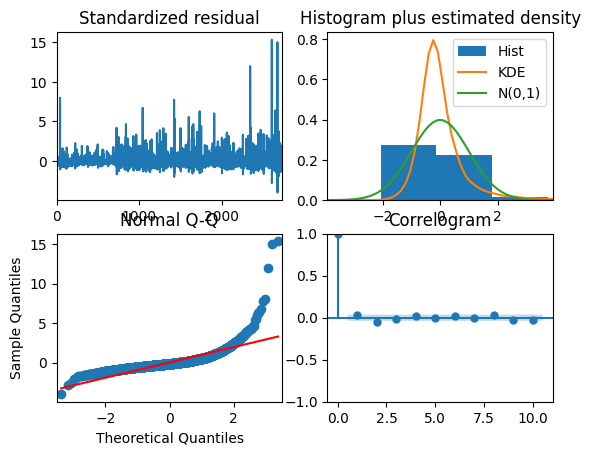

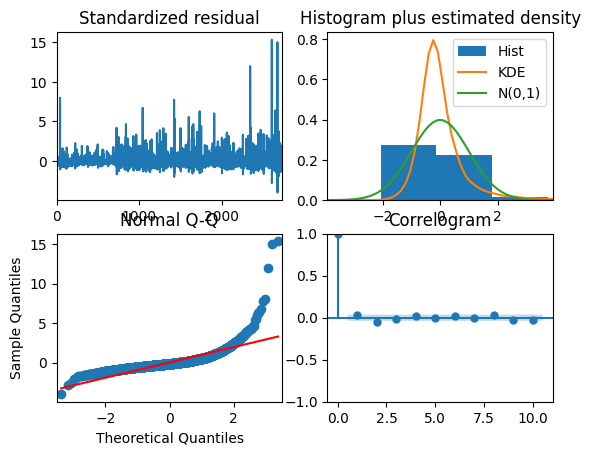

In [15]:
Sls_Fcst_BuIm_aaa_M.plot_diagnostics()

Order is (1, 0, 2)

In [ ]:
## Implementing Statistical Model - ARIMA

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
from statsmodels.tsa.arima.model import ARIMA as Sls_Fcst_BuIm_am
Sls_Fcst_BuIm_am_M = Sls_Fcst_BuIm_am(Sls_Fcst_BuIm_TR['Furniture Sales'],order=(1,0,2))
Sls_Fcst_BuIm_am_M = Sls_Fcst_BuIm_am_M.fit()

In [19]:

Sls_Fcst_BuIm_Pre = Sls_Fcst_BuIm_am_M.forecast(steps=Step)
Sls_Fcst_BuIm_Pre =Sls_Fcst_BuIm_Pre.array
Sls_Fcst_BuIm_Pre

<PandasArray>
[ -59542.25395598931,  -4617.213246948274,  -3690.897542210293,
 -2948.0078027344084, -2352.2226269074968, -1874.4128566641607,
 -1491.2173932605592, -1183.9010252877579,  -937.4384257957548,
  -739.7795332706045,  -581.2603994353038, -454.13069901620133,
  -352.1748004592308,  -270.4078709668262, -204.83215780806287,
 -152.24152999587574, -110.06472397344083,  -76.23962927012431,
  -49.11246769511705, -27.356936732940667,  -9.909363895748683,
    4.08329840416819,  15.305180098918925,  24.304941979238855,
  31.522600844805684,  37.311042827211054,   41.95327671603059,
   45.67627083845752,   48.66205000589841,   51.05659507998857]
Length: 30, dtype: float64

In [20]:
Sls_Fcst_BuIm_DX = Sls_Fcst_BuIm.index
Sls_Fcst_BuIm_DX = Sls_Fcst_BuIm_DX[-Step:]
Sls_Fcst_BuIm_DX

Index(['17-11-2020', '18-11-2020', '19-11-2020', '20-11-2020', '23-11-2020',
       '24-11-2020', '25-11-2020', '27-11-2020', '30-11-2020', '01-12-2020',
       '02-12-2020', '03-12-2020', '04-12-2020', '07-12-2020', '08-12-2020',
       '09-12-2020', '10-12-2020', '11-12-2020', '14-12-2020', '15-12-2020',
       '16-12-2020', '17-12-2020', '18-12-2020', '21-12-2020', '22-12-2020',
       '23-12-2020', '24-12-2020', '28-12-2020', '29-12-2020', '30-12-2020'],
      dtype='object', name='Date')

In [22]:
#make a new data with prediction
Sls_Fcst_BuIm_NW = Sls_Fcst_BuIm_pd.DataFrame(Sls_Fcst_BuIm_Pre, index=Sls_Fcst_BuIm_DX, columns=['pre'])
Sls_Fcst_BuIm_NW

,pre
Date,
17-11-2020,-59542.253956
18-11-2020,-4617.213247
19-11-2020,-3690.897542
20-11-2020,-2948.007803
23-11-2020,-2352.222627
24-11-2020,-1874.412857
25-11-2020,-1491.217393
27-11-2020,-1183.901025
30-11-2020,-937.438426


In [24]:
Sls_Fcst_BuIm_NW['Final'] = Sls_Fcst_BuIm['Furniture Sales'].iloc[-Step:] + Sls_Fcst_BuIm_NW['pre'].cumsum()
Sls_Fcst_BuIm_NW

,pre,Final
Date,,
17-11-2020,-59542.253956,145457.746044
18-11-2020,-4617.213247,116540.532797
19-11-2020,-3690.897542,177849.635255
20-11-2020,-2948.007803,129701.627452
23-11-2020,-2352.222627,395749.404825
24-11-2020,-1874.412857,176674.991969
25-11-2020,-1491.217393,84783.774575
27-11-2020,-1183.901025,24999.873550
30-11-2020,-937.438426,166762.435124


In [25]:
Rea = Sls_Fcst_BuIm[-Step:]
Rea

,Furniture Sales
Date,
17-11-2020,205000
18-11-2020,180700
19-11-2020,245700
20-11-2020,200500
23-11-2020,468900
24-11-2020,251700
25-11-2020,161300
27-11-2020,102700
30-11-2020,245400


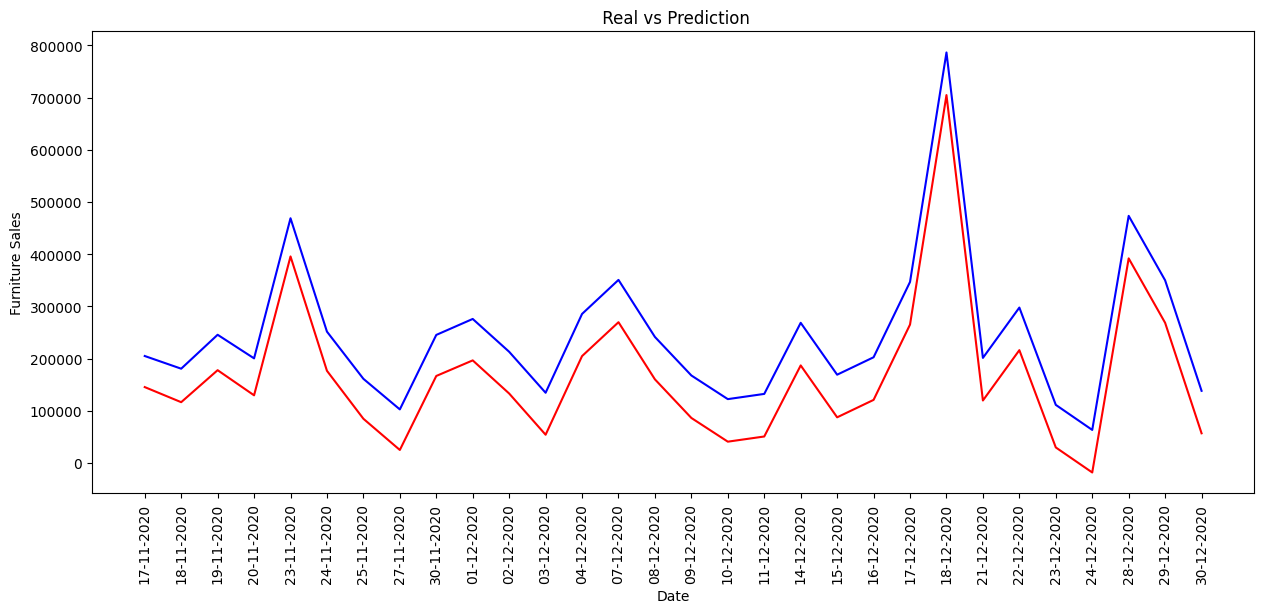

In [27]:

Stck = Sls_Fcst_BuIm_pd.DataFrame()
Stck['Rea']=Rea['Furniture Sales']
Stck['Pre']=Sls_Fcst_BuIm_NW['Final']
Stck['Sls_Fcst_BuIm_DX']=list(Sls_Fcst_BuIm_DX)
Stck=Stck.set_index("Sls_Fcst_BuIm_DX")

Sls_Fcst_BuIm_mplb.figure(figsize=(15, 6))
Sls_Fcst_BuIm_mplb.plot(Stck["Pre"], label="predd", color='red')
Sls_Fcst_BuIm_mplb.plot(Stck["Rea"], label="real", color='blue')
Sls_Fcst_BuIm_mplb.xticks(rotation=90)
Sls_Fcst_BuIm_mplb.title(' Real vs Prediction')
Sls_Fcst_BuIm_mplb.xlabel('Date')
Sls_Fcst_BuIm_mplb.ylabel('Furniture Sales')
Sls_Fcst_BuIm_mplb.show()

In [28]:
from sklearn.metrics import r2_score as Sls_Fcst_BuIm_rse
from sklearn.metrics import mean_absolute_error as Sls_Fcst_BuIm_mae
from sklearn.metrics import mean_squared_error as Sls_Fcst_BuIm_mse
import math as Sls_Fcst_BuIm_mth

print("  R2 ", Sls_Fcst_BuIm_rse(Stck['Rea'], Stck['Pre'])*100)
print("  MAE ", Sls_Fcst_BuIm_mae(Stck['Rea'], Stck['Pre']))
print("  MSE ", Sls_Fcst_BuIm_mse(Stck['Rea'], Stck['Pre']))
print("  RMSE ", Sls_Fcst_BuIm_mth.sqrt(Sls_Fcst_BuIm_mse(Stck['Rea'], Stck['Pre'])))

  R2  68.52777520904448
  MAE  78313.93572254272
  MSE  6164650020.226993
  RMSE  78515.28526488962
